
# Xgboost Model

In [ ]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df=pd.read_csv("loan_prediction.csv")


In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

# Handle the Missing values

In [6]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Treating the Null Value

We will fill the missing values in numeric data type using the mean value of that particular column and categorical data type using the most repeated value

In [8]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [9]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [10]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [13]:
#checking the null values now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now the null value is retreated

# Handling Categorical Values

In [14]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [17]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [19]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [20]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)

In [21]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [23]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [27]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [29]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [31]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [32]:
# dummy columns are created for the categories in Loan_ID
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


##Balancing The Dataset


In [34]:
from imblearn.combine import SMOTETomek

In [35]:
smote = SMOTETomek(0.90)


In [36]:
#dividing the dataset into dependent and independent y and x respectively

y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [37]:
#creating the new x and y for balance data
x_bal,y_bal = smote.fit_resample(x,y)

In [38]:
#printing the value before and after balancing 
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    360
0    317
Name: Loan_Status, dtype: int64



# Scaling The Data

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [41]:
x_bal = pd.DataFrame(x_bal)

In [42]:

x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.791538,0.556307,-1.179926,-0.700859,0.601808,-0.336878,0.090531,-0.487102,-0.290351,0.286934,0.554031,1.339796
1,-1.785586,0.556307,0.847511,0.358252,0.601808,-0.336878,-0.126530,-0.023442,-0.192853,0.286934,0.554031,-1.183269
2,-1.779635,0.556307,0.847511,-0.700859,0.601808,2.968433,-0.397942,-0.487102,-0.948461,0.286934,0.554031,1.339796
3,-1.773683,0.556307,0.847511,-0.700859,-1.661659,-0.336878,-0.469439,0.237904,-0.290351,0.286934,0.554031,1.339796
4,-1.767731,0.556307,-1.179926,-0.700859,0.601808,-0.336878,0.116421,-0.487102,-0.034419,0.286934,0.554031,1.339796


# Splitting Data Into Train And Test

In [43]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 42)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(453, 12)
(453,)
(224, 12)
(224,)


# MODELING


## Xgboost Model

In [46]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [47]:
xg = GradientBoostingClassifier() 

In [48]:
xg.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
yPred = xg.predict(x_test)

In [51]:
#confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test ,yPred) )

Confusion matrix
[[ 71  37]
 [ 15 101]]


In [52]:
#Classification report
print("Classification report")
print(classification_report (y_test, yPred))

Classification report
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       108
           1       0.73      0.87      0.80       116

    accuracy                           0.77       224
   macro avg       0.78      0.76      0.76       224
weighted avg       0.78      0.77      0.76       224



In [53]:
y_pred=xg.predict(x_test)
y_pred1=xg.predict(x_train)

In [54]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.7678571428571429
Training accuracy:  0.9403973509933775


In [55]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,71,37
1,15,101


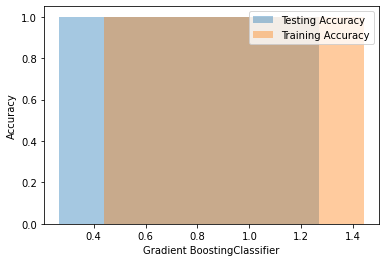

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(accuracy_score(y_test,y_pred), label = 'Testing Accuracy')
sns.distplot(accuracy_score(y_train,y_pred1), label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('Gradient BoostingClassifier')
plt.ylabel('Accuracy')
plt.show()